# Observations and Insights 

        1. Relatively clean data, we only had to throw away 1 record of a timepoint being double recorded for a mouse. We also had a fairly split sample between all of the different drugs, but Capomulin and Ramicane had a significant boost in count.
        2. When looking at quartiles of the top 4 drugs, we only had 1 value as an outlier.
        3. There is a positive correlation for mouse weight and average tumor volume when narrowing focus to mice treated with Capomulin.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata
#study_results

# Combine the data into a single dataset
pharm_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
pharm_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
pharm_data["Mouse ID"].nunique()


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = pharm_data.loc[pharm_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = pharm_data.loc[pharm_data['Mouse ID'] == 'g989']

duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = pd.DataFrame(pharm_data[pharm_data['Mouse ID'].isin(duplicate_mice)==False])

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


#Running stat calculations
regimen_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_variance = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

#Retroactively adding in counts column for later usage
regimen_count = clean_df.groupby('Drug Regimen').count()["Tumor Volume (mm3)"]

summary_stats_table = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, 
                                    "Standard Deviation": regimen_std, "SEM": regimen_sem, "Count" : regimen_count})




summary_stats_table

,Mean,Median,Variance,Standard Deviation,SEM,Count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,148
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
single_stats_table = clean_df.groupby('Drug Regimen').agg(['mean','median','var','std','sem', 'count'])["Tumor Volume (mm3)"]
single_stats_table

,mean,median,var,std,sem,count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,148
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


## Bar and Pie Charts

Text(0.5, 1.0, 'Data Points per Treatment')

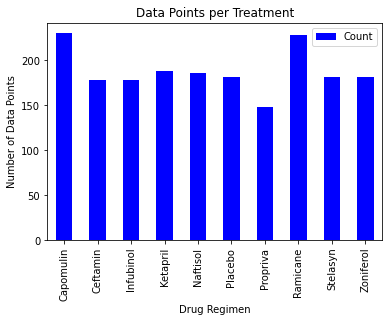

In [9]:
#Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements_table = summary_stats_table[["Count"]]
measurements_table

measurements_table.plot(kind="bar", facecolor="blue")
plt.ylabel("Number of Data Points")
plt.title("Data Points per Treatment")

Text(0, 0.5, 'Count')

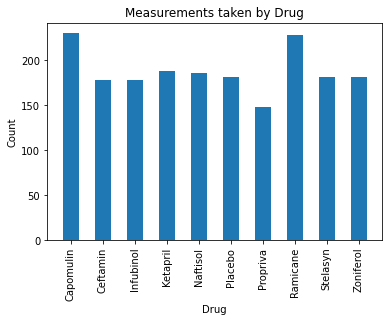

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(measurements_table))
x_axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, measurements_table.index.values, rotation="vertical")

plt.bar (x_axis, measurements_table["Count"], width=.5)
plt.title("Measurements taken by Drug")
plt.xlabel("Drug")
plt.ylabel("Count")

array([<AxesSubplot:ylabel='Total'>], dtype=object)

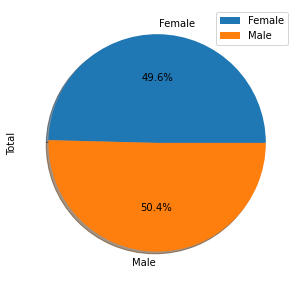

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = clean_df.groupby("Sex")["Mouse ID"].nunique()
mice_gender

mice_gender_df = pd.DataFrame({"Total": mice_gender})
mice_gender_df.plot (kind="pie", subplots=True, autopct='%1.1f%%', shadow= True, figsize=(8,5))

Text(0, 0.5, 'Total')

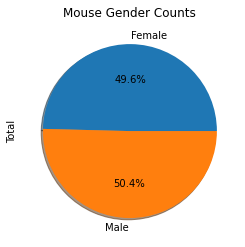

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_size = mice_gender_df["Total"]
pie_size
labels = list(mice_gender_df.index)
labels

plt.pie (pie_size, labels=labels, autopct='%1.1f%%', shadow= True)
plt.title('Mouse Gender Counts')
plt.ylabel('Total')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list =  ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs_df = clean_df[clean_df['Drug Regimen'].isin(drug_list)]
drugs_df

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = pharm_data.groupby("Mouse ID")
last_timepoint = last_timepoint["Timepoint"].max()
last_timepoint_df = pd.DataFrame(last_timepoint)


# View the groupby dataframe
greatest_drugs_df = pd.merge(last_timepoint_df, pharm_data, on = ["Mouse ID","Timepoint"])
greatest_drugs_df.head()
#Dropping duplicates and keeping greatest timepoint for each mouse
# (already accomplished)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
volume_list = greatest_drugs_df["Tumor Volume (mm3)"]
volume_list

# Create empty list to fill with tumor vol data (for plotting)
vol_cap = []
vol_ram = []
vol_inf = []
vol_cef = []

for i in range(len(greatest_drugs_df)-1):
    if greatest_drugs_df.loc[i, "Drug Regimen"] == "Capomulin":
        vol_cap.append(greatest_drugs_df.loc[i, "Tumor Volume (mm3)"])
    if greatest_drugs_df.loc[i, "Drug Regimen"] == "Ramicane":
        vol_ram.append(greatest_drugs_df.loc[i, "Tumor Volume (mm3)"])
    if greatest_drugs_df.loc[i, "Drug Regimen"] == "Infubinol":
        vol_inf.append(greatest_drugs_df.loc[i, "Tumor Volume (mm3)"])
    if greatest_drugs_df.loc[i, "Drug Regimen"] == "Ceftamin":
        vol_cef.append(greatest_drugs_df.loc[i, "Tumor Volume (mm3)"])

        
#Adding volumes into list
master_vol = [vol_cap, vol_ram, vol_inf, vol_cef]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
outliers_found = []
for drugs in range(len(master_vol)):
    quartiles = pd.Series(master_vol[drugs]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25].round(4)
    upperq = quartiles[0.75].round(4)
    iqr = (upperq-lowerq).round(4)
    print(f"\n{drug_list[drugs]}")
    print(f"----------------------------------------------------------")    
    print(f"The lower quartile of tumor volume is: {lowerq.round(4)}.")
    print(f"The upper quartile of tumor volume is: {upperq.round(4)}.")
    print(f"The interquartile range of tumor volume is: {iqr}.")
    print(f"The median of tumor volume is: {quartiles[0.5].round(4)}.")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound.round(4)} could be outliers.")
    print(f"Values above {upper_bound.round(4)} could be outliers.")
    print(f"----------------------------------------------------------")    
    

       
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    for outliers in range(len(master_vol[drugs])):
        if (master_vol[drugs][outliers] < lower_bound) or (master_vol[drugs][outliers] > upper_bound):
            outlier = master_vol[drugs][outliers]
            outliers_found.append(outlier)
            print(f"The outliers are {outliers_found}.")



Capomulin
----------------------------------------------------------
The lower quartile of tumor volume is: 32.3774.
The upper quartile of tumor volume is: 40.1592.
The interquartile range of tumor volume is: 7.7818.
The median of tumor volume is: 38.1252.
Values below 20.7047 could be outliers.
Values above 51.8319 could be outliers.
----------------------------------------------------------

Ramicane
----------------------------------------------------------
The lower quartile of tumor volume is: 31.5605.
The upper quartile of tumor volume is: 40.659.
The interquartile range of tumor volume is: 9.0985.
The median of tumor volume is: 36.5617.
Values below 17.9128 could be outliers.
Values above 54.3067 could be outliers.
----------------------------------------------------------

Infubinol
----------------------------------------------------------
The lower quartile of tumor volume is: 54.0486.
The upper quartile of tumor volume is: 65.5257.
The interquartile range of tumor volume is

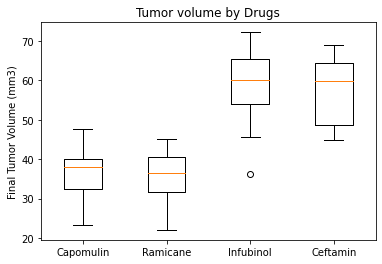

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(master_vol)
ax1.set_title("Tumor volume by Drugs")
ax1.set_xticklabels(drug_list)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

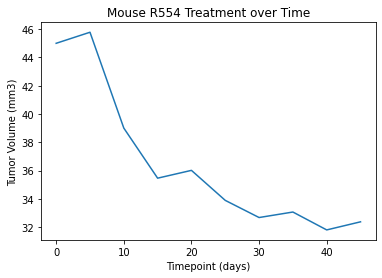

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Running this to select list to choose from
greatest_drugs_df.loc[greatest_drugs_df["Drug Regimen"] == "Capomulin"]

#Selected mouse r554
mouse_r554 = pharm_data.loc[pharm_data["Mouse ID"] == "r554"]
mouse_r554

plt.plot(mouse_r554["Timepoint"], mouse_r554["Tumor Volume (mm3)"])
plt.title("Mouse R554 Treatment over Time")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

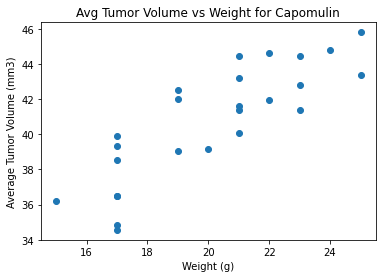

In [40]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_drug = pharm_data.loc[pharm_data["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
tumor_avg = cap_drug["Tumor Volume (mm3)"].mean()
mouse_weight = cap_drug["Weight (g)"].unique().astype('float')
plt.scatter(mouse_weight, tumor_avg)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Avg Tumor Volume vs Weight for Capomulin")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


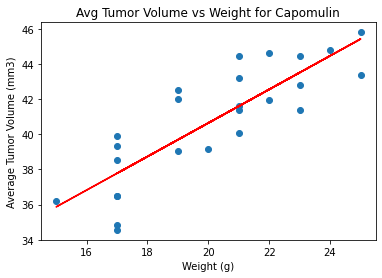

In [41]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Getting relevant info & creating equation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, tumor_avg)
regression_values = mouse_weight * slope + intercept

#Plotting correlation line
correlation = st.pearsonr(mouse_weight, tumor_avg)
plt.scatter(mouse_weight, tumor_avg)
plt.plot(mouse_weight,regression_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Avg Tumor Volume vs Weight for Capomulin")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}.")

In [39]:
cap_drug["Weight (g)"].unique().astype('float')

Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
i557    24.0
i738    20.0
j119    23.0
j246    21.0
l509    21.0
l897    19.0
m601    17.0
m957    19.0
r157    25.0
r554    17.0
r944    25.0
s185    17.0
s710    23.0
t565    17.0
u364    17.0
v923    21.0
w150    23.0
w914    21.0
x401    15.0
y793    17.0
Name: Weight (g), dtype: float64